# Examples from the SWprepost Readme

> Joseph P. Vantassel, The University of Texas at Austin

In [3]:
import time

import matplotlib.pyplot as plt
import numpy as np

import swprepost

## GroundModel

### Let's import 100 ground models

In [5]:
time_start = time.perf_counter()
gm_suite = swprepost.GroundModelSuite.from_geopsy(fname="inputs/from_geopsy_100gm.txt")
time_stop = time.perf_counter()
print(f"Elapsed Time: {np.round(time_stop - time_start)} seconds.")
print(gm_suite)

Elapsed Time: 0.0 seconds.
GroundModelSuite with 100 GroundModels.


### Now let's plot the models.

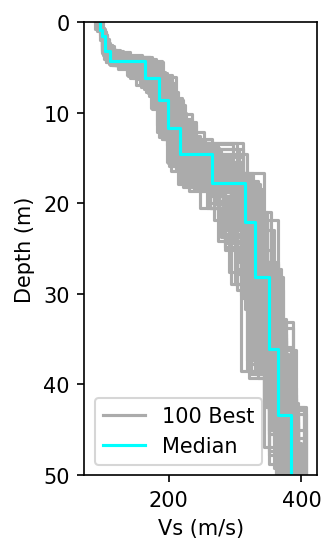

In [16]:
fig, ax = plt.subplots(figsize=(2,4), dpi=150)

# Plot 100 best
label = "100 Best"
for gm in gm_suite:
    ax.plot(gm.vs2, gm.depth, color="#ababab", label=label)
    label=None

# Calculate Median
median = gm_suite.median()
ax.plot(median.vs2, median.depth, color="#00ffff", label="Median")

ax.set_ylim(50,0)
ax.set_xlabel("Vs (m/s)")
ax.set_ylabel("Depth (m)")
ax.legend()
plt.show()

### And now the uncertainty

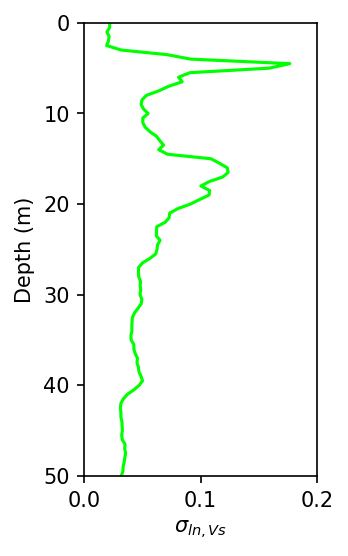

In [23]:
fig, ax = plt.subplots(figsize=(2,4), dpi=150)

# Calculate Median
disc_depth, siglnvs = gm_suite.sigma_ln()
ax.plot(siglnvs, disc_depth, color="#00ff00")

ax.set_xlim(0, 0.2)
ax.set_ylim(50,0)
ax.set_xlabel("$\sigma_{ln,Vs}$")
ax.set_ylabel("Depth (m)")

plt.show()